## Linear Regression in Tensorflow

In [28]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [29]:
boston = load_boston()

In [30]:
features = np.array(boston.data)
labels = np.array(boston.target)
labels = labels.reshape((-1,1))
print(features.shape,labels.shape)

(506, 13) (506, 1)


In [31]:
def normalize(data):
    normal_data = (data-data.mean())/data.std()
    return normal_data

In [32]:
features = normalize(features)
labels = normalize(labels)

In [33]:
bias = np.ones((features.shape[0],1))
features = np.concatenate((bias,features),axis=1)
print(features.shape)

(506, 14)


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(features,labels,test_size=0.2)

In [35]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 14) (404, 1)
(102, 14) (102, 1)


### Creating Model

In [36]:
n_samples = features.shape[0]
n_features = features.shape[1]
epochs = 40

In [37]:
X = tf.placeholder(dtype=tf.float32,shape=[None,n_features])
Y = tf.placeholder(dtype=tf.float32,shape=[None,1])
W = tf.Variable(tf.random_normal(shape=(n_features,1)))
print(W)
Y_pred = tf.matmul(X,W)

<tf.Variable 'Variable_2:0' shape=(14, 1) dtype=float32_ref>


In [38]:
cost = tf.reduce_mean(tf.square(Y_pred-Y))
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [39]:
loss = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        sess.run(opt,feed_dict = {
            X : X_train,
            Y : Y_train
        })
        train_loss = sess.run(cost,feed_dict = {
            X : X_train,
            Y : Y_train
        })
        loss.append(train_loss)
        test_loss = sess.run(cost,feed_dict = {
            X : X_test,
            Y : Y_test
        })
        print('Epoch {} :'.format(epoch+1))
        print('Training Loss : {:.4f} and Testing Loss : {:.4f}'.format(train_loss,test_loss))

Epoch 1 :
Training Loss : 4.4994 and Testing Loss : 4.9629
Epoch 2 :
Training Loss : 3.3226 and Testing Loss : 3.6889
Epoch 3 :
Training Loss : 2.6451 and Testing Loss : 2.9386
Epoch 4 :
Training Loss : 2.2464 and Testing Loss : 2.4856
Epoch 5 :
Training Loss : 2.0039 and Testing Loss : 2.2028
Epoch 6 :
Training Loss : 1.8492 and Testing Loss : 2.0182
Epoch 7 :
Training Loss : 1.7443 and Testing Loss : 1.8913
Epoch 8 :
Training Loss : 1.6679 and Testing Loss : 1.7987
Epoch 9 :
Training Loss : 1.6081 and Testing Loss : 1.7271
Epoch 10 :
Training Loss : 1.5584 and Testing Loss : 1.6688
Epoch 11 :
Training Loss : 1.5149 and Testing Loss : 1.6192
Epoch 12 :
Training Loss : 1.4757 and Testing Loss : 1.5756
Epoch 13 :
Training Loss : 1.4394 and Testing Loss : 1.5364
Epoch 14 :
Training Loss : 1.4055 and Testing Loss : 1.5006
Epoch 15 :
Training Loss : 1.3735 and Testing Loss : 1.4674
Epoch 16 :
Training Loss : 1.3430 and Testing Loss : 1.4364
Epoch 17 :
Training Loss : 1.3140 and Testing Los

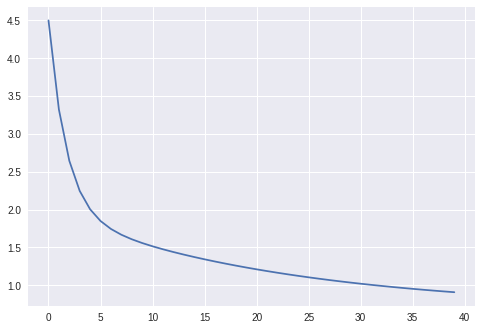

In [43]:
plt.style.use('seaborn')
plt.plot(loss)
plt.show()